In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("C:\\Users\\bhima\\OneDrive\\Desktop\\Mian Flow\\heart.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
#data cleaning
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#Handle Outliers
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
data=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]

In [11]:
#EDA
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.0,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,53.431730,0.691808,0.924577,128.685306,242.075423,0.0,0.551365,150.669701,0.323797,0.972432,1.438231,0.495449,2.331599,0.548765
std,9.225098,0.462047,1.019105,15.314066,44.521145,0.0,0.515667,22.567898,0.468228,1.050258,0.589973,0.705479,0.568764,0.497940
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.0,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,209.000000,0.0,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.0,1.000000,154.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.0,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,76.000000,1.000000,3.000000,170.000000,360.000000,0.0,2.000000,202.000000,1.000000,4.000000,2.000000,2.000000,3.000000,1.000000


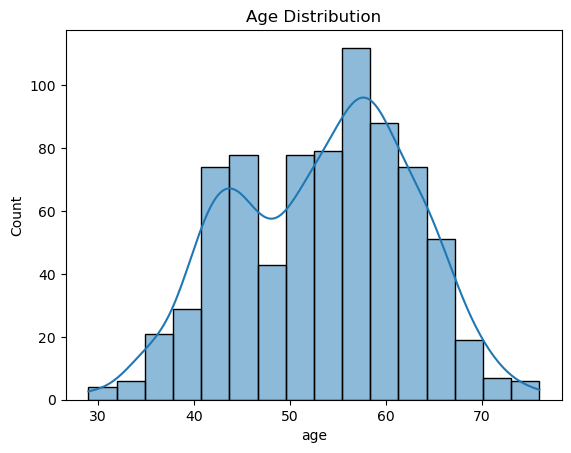

In [12]:
#data
import seaborn as sns
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')
plt.show()


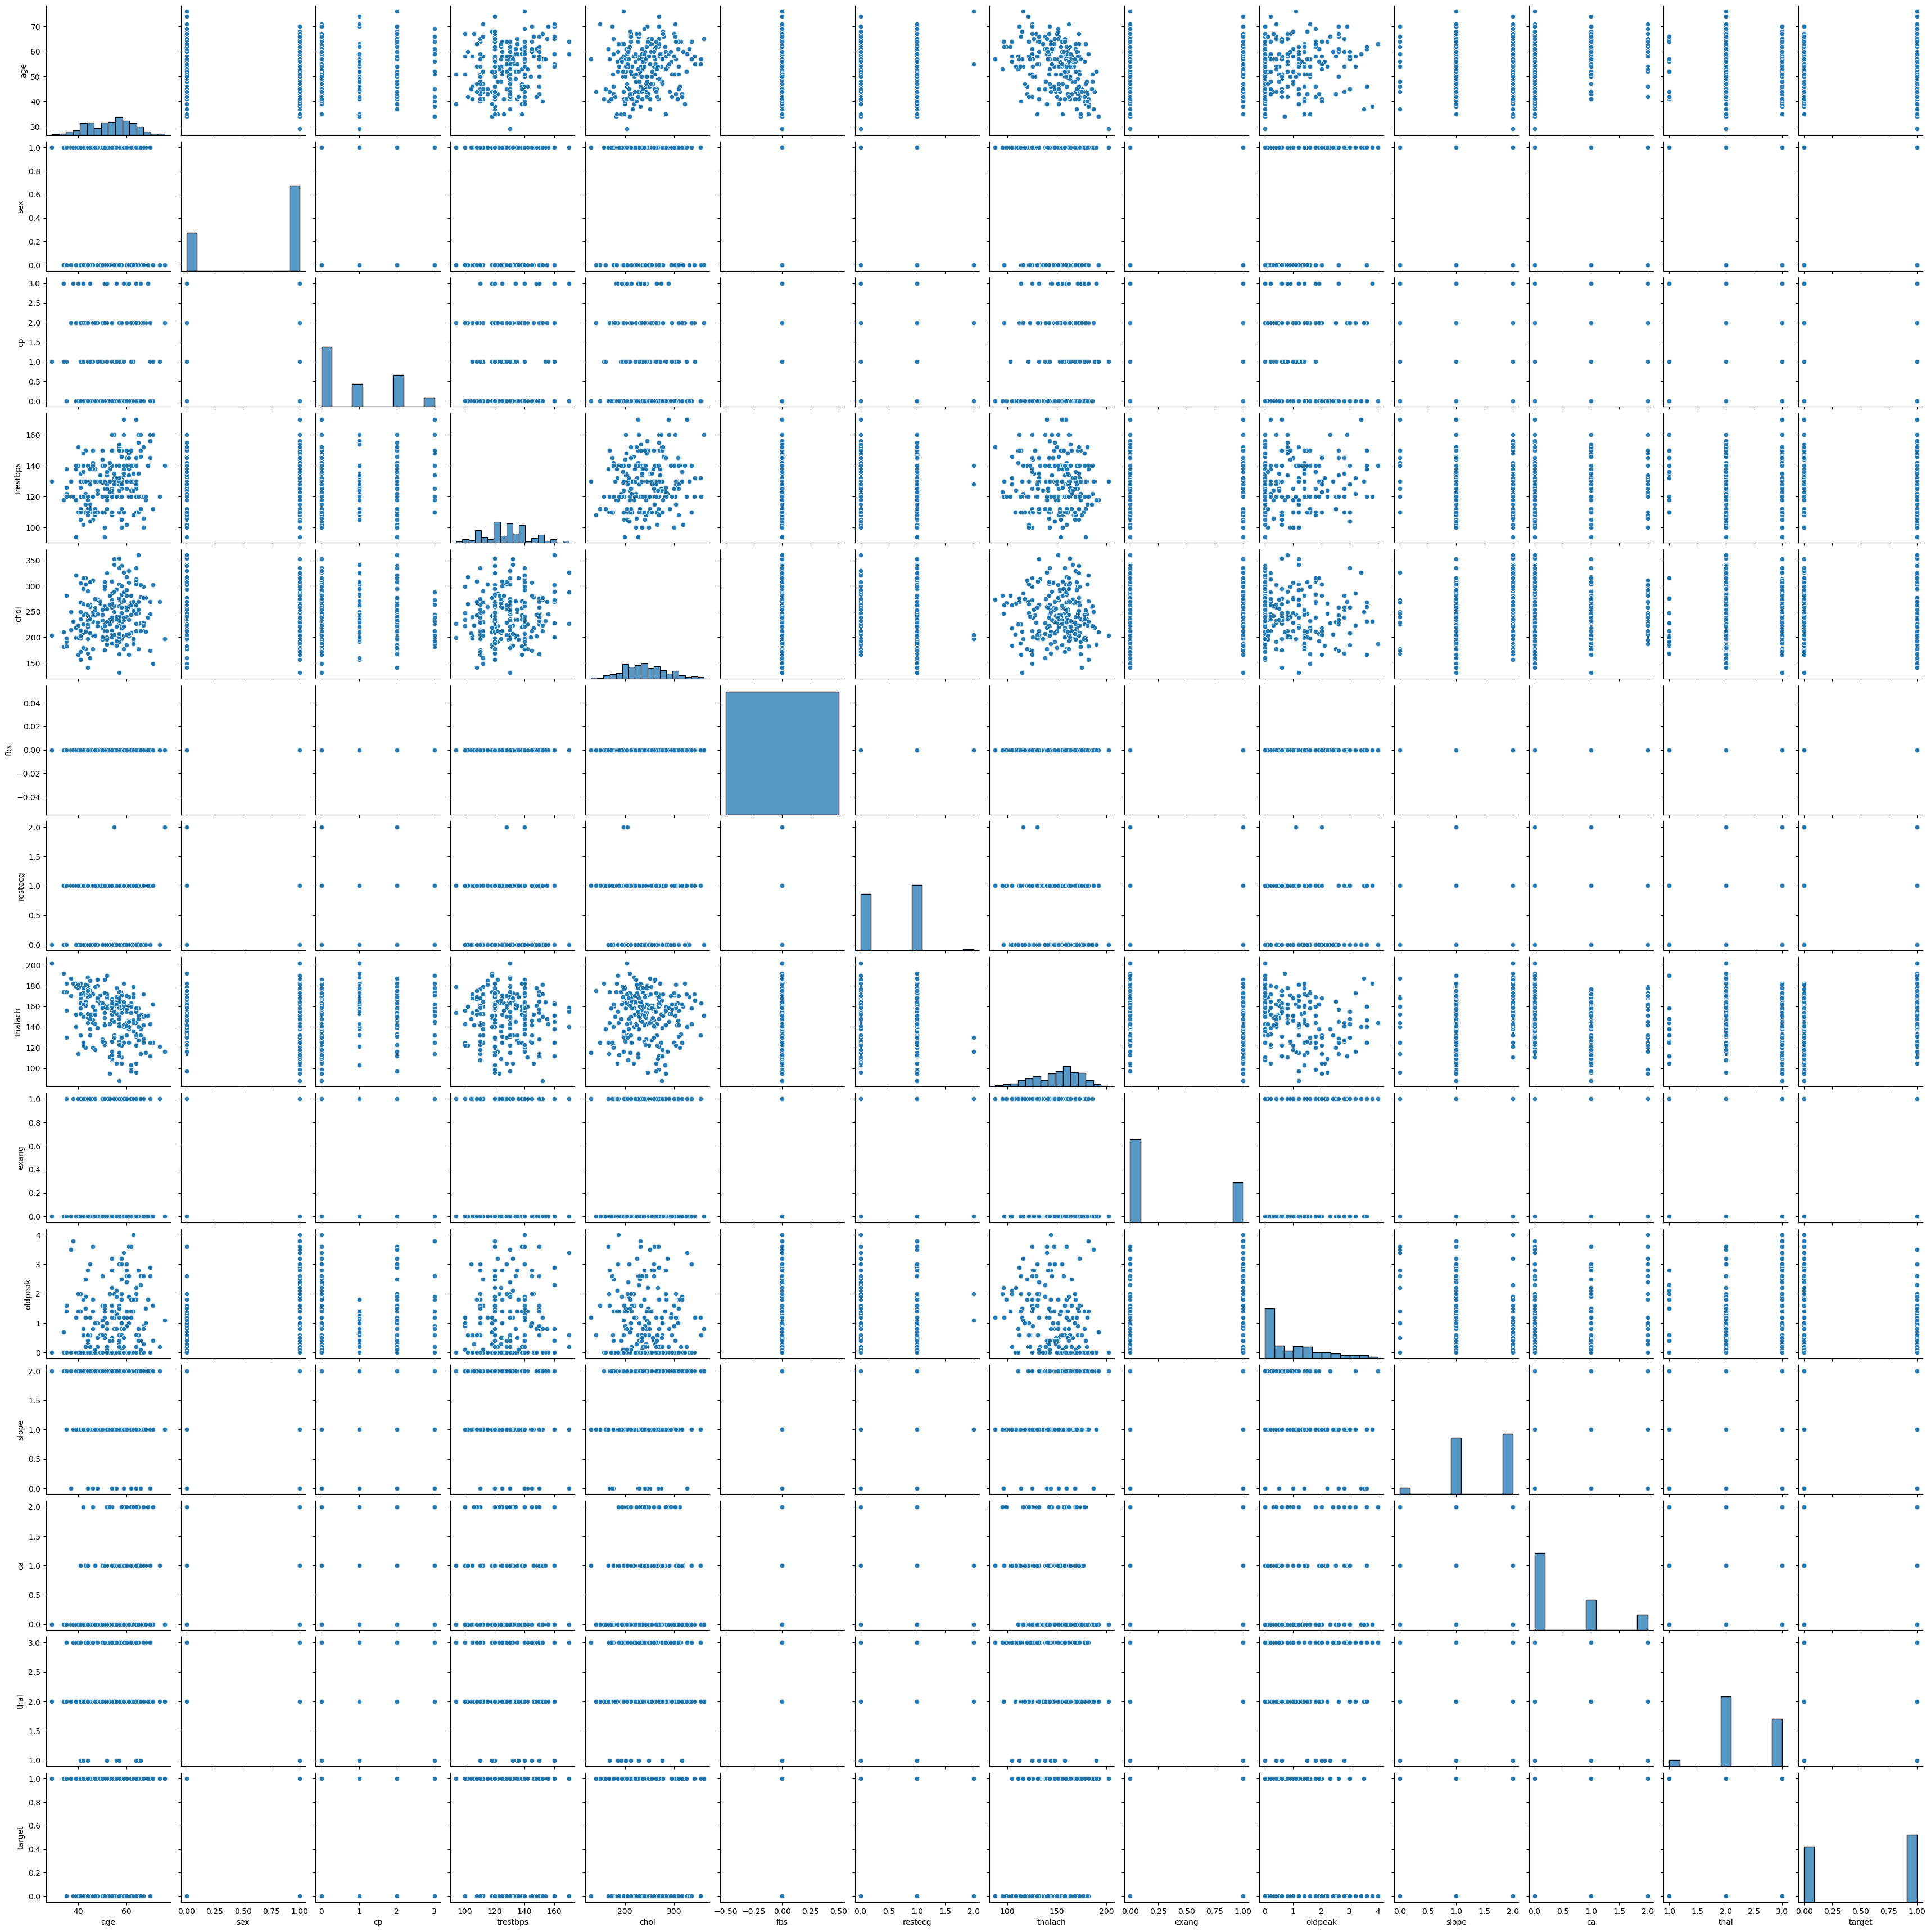

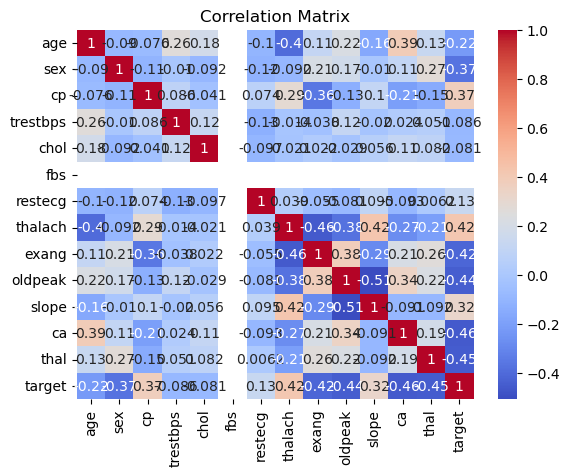

In [13]:
#relation between variables
sns.pairplot(data)
plt.show()
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Average age of patients with heart disease: 51.58530805687204
T-statistic: -2.246971027579935 P-value: 0.02492547714969658


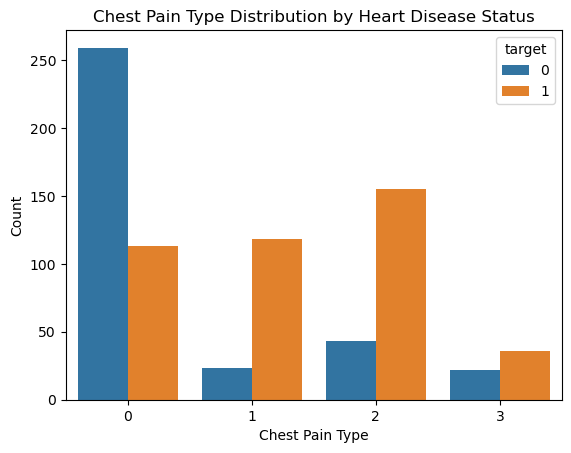

In [25]:
# Question 
#1 Average age

average_age = data[data['target'] == 1]['age'].mean()
print("Average age of patients with heart disease:", average_age)

# 2 cholestrol level btw patiebts with and without heart disease

import scipy.stats as stats
chol_with_disease = data[data['target'] == 1]['chol']
chol_without_disease = data[data['target'] == 0]['chol']
t_stat, p_val = stats.ttest_ind(chol_with_disease, chol_without_disease)
print("T-statistic:", t_stat, "P-value:", p_val)
# 3 chest pain type
sns.countplot(x='cp', hue='target', data=data)
plt.title('Chest Pain Type Distribution by Heart Disease Status')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()



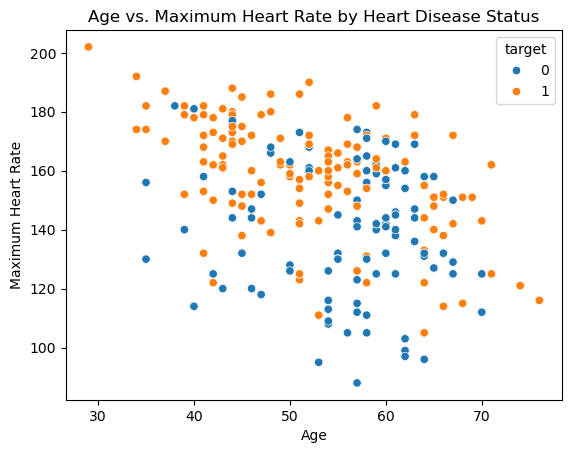

In [17]:
# 4 relation btw maxheart rate and age
sns.scatterplot(x='age', y='thalach', hue='target', data=data)
plt.title('Age vs. Maximum Heart Rate by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show()


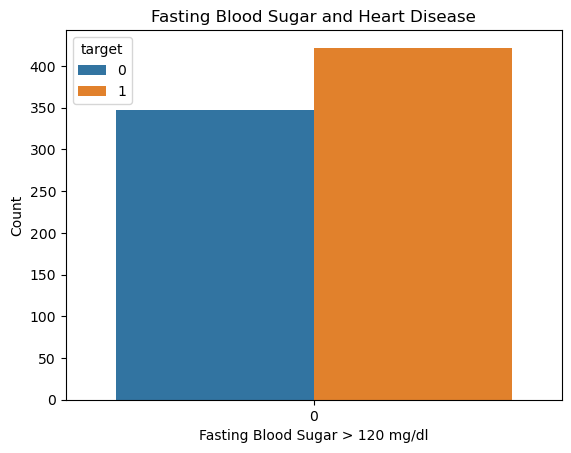

In [18]:
# 5 blood sugar impact on heart disease
sns.countplot(x='fbs', hue='target', data=data)
plt.title('Fasting Blood Sugar and Heart Disease')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl')
plt.ylabel('Count')
plt.show()


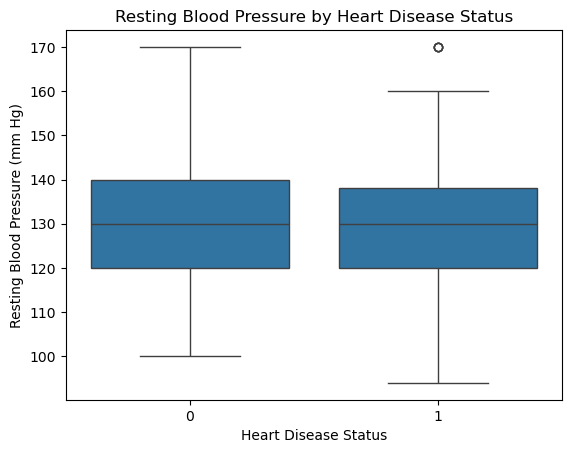

In [19]:
# 6 blood sugar variation 
sns.boxplot(x='target', y='trestbps', data=data)
plt.title('Resting Blood Pressure by Heart Disease Status')
plt.xlabel('Heart Disease Status')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()


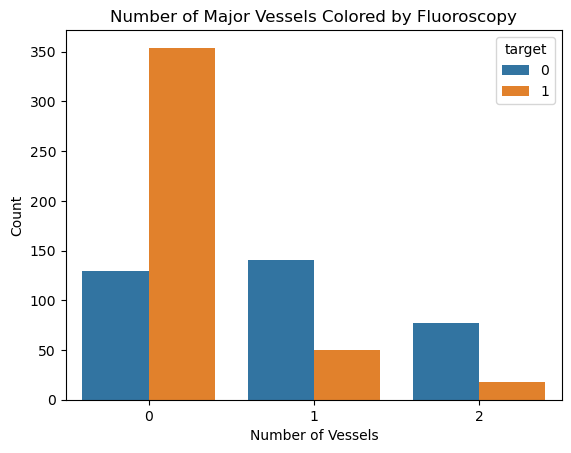

In [26]:
#  7 major vessels coloured by fluroscopy
sns.countplot(x='ca', hue='target', data=data)
plt.title('Number of Major Vessels Colored by Fluoroscopy')
plt.xlabel('Number of Vessels')
plt.ylabel('Count')
plt.show()
